In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings
import random

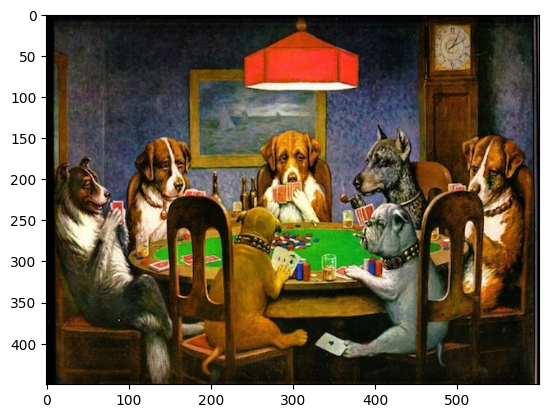

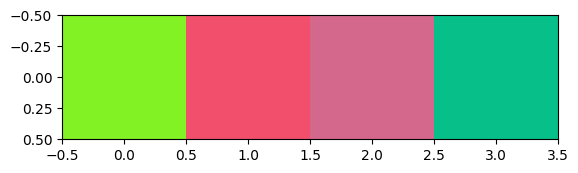

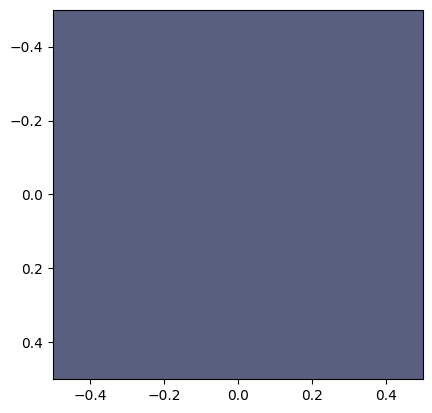

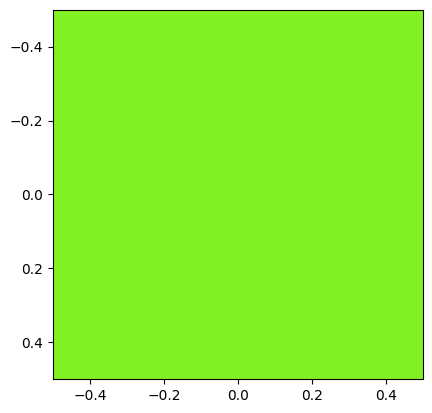

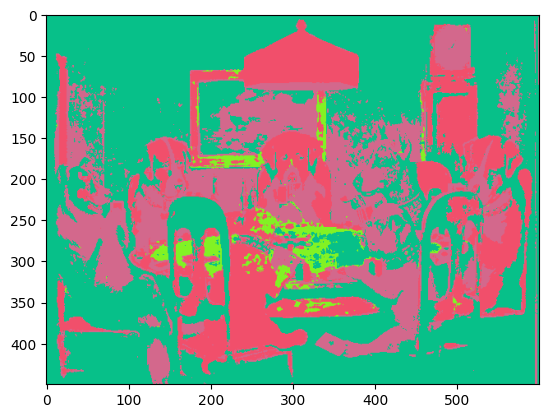

(array([0, 1, 2, 3]), array([  7200,  54312,  64210, 144278]))


In [2]:
# Read in the image
img = plt.imread('Dogs.jpg')
img = img / 255
plt.imshow(img, vmin=0, vmax=1)
plt.show()

rng = np.random.default_rng(1)
# picking 4 colors (each has 3 values one for each of Red/Green/Blue) from a random uniform 
# distribution between 0 and 1
colors = rng.uniform(0,1,(4,3))
# show the colors
plt.imshow([colors])
plt.show()

# store the same
img_shape = img.shape

X = img.reshape(img_shape[0]*img_shape[1], img_shape[2])

pixel = X[85000]
plt.imshow([[pixel]])
plt.show()
# grab centroid color
c = colors[0]
# plot centroid color
plt.imshow([[c]])
plt.show()

# Euclidean distance
# print((((pixel-c)**2).sum())** .5)
# Generalize for all centroids against one pixel
distance = ((pixel-colors)**2).sum(axis=1)**.5
# index of min value
distance.argmin()

# Create list of 4 arrays hold distance against all pixels for each colors
distance = [((X-c)**2).sum(axis=1)**.5 for c in colors]
distance[0].shape

# stack all arrays into one
distance = np.vstack(distance)
# find min distance for each pixels against 4 points
labels = distance.argmin(axis=0)

# show the image
Y = colors[labels]
Y = Y.reshape(img_shape)
plt.imshow(Y)
plt.show()

# Find unique label counts
print(np.unique(labels, return_counts=True))

7200


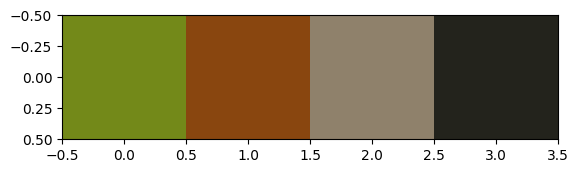

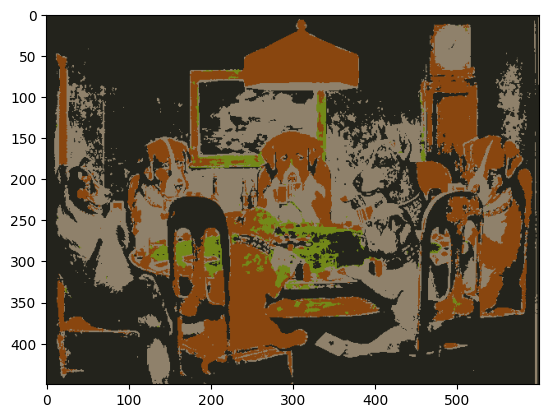

In [3]:
# Create boolean index for all points which have label 0
print(len(X[labels == 0]))

# Find centroid of label 0
centroid = X[labels == 0].mean(axis=0)
centroid

# Find new color centroids
colors = [X[labels==l].mean(axis=0) for l in range(len(colors))]
colors = np.vstack(colors)

plt.imshow([colors])
plt.show()

# Reapply to the image
Y = colors[labels]
Y = Y.reshape(img_shape)
plt.imshow(Y)
plt.show()

In [4]:
# refactor into functions
def assign_labels(X, colors):
    distance = [((X-c)**2).sum(axis=1) ** .5 for c in colors]
    distance = np.vstack(distance)
    labels = distance.argmin(axis=0)
    return labels

def compute_centroids(X, colors, labels):
    colors = [X[labels==l].mean(axis=0) for l in list(range(len(colors)))]
    colors = np.vstack(colors)
    return colors

def plot_clusters(colors, labels, img_shape):
    Y = colors[labels]
    Y = Y.reshape(img_shape)
    plt.imshow(Y)
    plt.show()

def additional_color(diff):
    colors = np.random.default_rng(random.randint(0,10)).uniform(0,1,(diff,3))
    return colors

def plot_color(colors):
    plt.imshow([colors])
    plt.show()

In [5]:
# colors = np.random.default_rng(1).uniform(0,1,(4,3))
# # First iteration
# print("Image after labeling:")
# labels = assign_labels(X, colors)
# plot_clusters(colors, labels, img_shape)
# print()
# colors = compute_centroids(X, colors, labels)
# print("Image after re-computing centroids:")
# plot_clusters(colors, labels, img_shape)

It took 126 trials


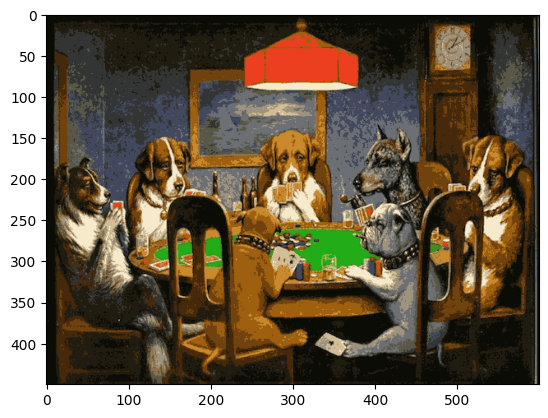

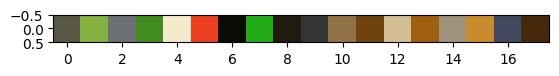

In [14]:
# Set the seed to make it easy to replicate
warnings.filterwarnings("ignore")
np.random.seed(2)
color_desired = 20
# Randomly choose colors
colors = np.random.uniform(0,1,(color_desired,3))

max_iter = 200
# start with labels as -1 meaning null
labels = np.ones(len(X)) * -1
for i in range(max_iter):
    # hold onto the old labels
    old_labels = labels.copy()
    labels = assign_labels(X, colors)
    
    colors = compute_centroids(X, colors, labels)
    
    while np.isnan(colors).any():
        colors = colors[~np.isnan(colors).any(axis=1)]
        extra_color = additional_color(color_desired-len(colors))
        np.concatenate((colors,extra_color))
        labels = assign_labels(X, colors)
        colors = compute_centroids(X, colors, labels)
    
    # If all labels are the same, end the iteration returns True if all items in an iterable are true
    if(labels == old_labels).all():
        print(f'It took {i} trials')
        plot_clusters(colors, labels, img_shape)
        plot_color(colors)
        break